# <span style='font-size:50px;background-color:yellow;'>&#128201;</span> <font color="#004080"> *Text Classification, Word2Vec (Using Scikit-learn) ::* </font>


### (a) : i. 20-newgroup dataset is a collection of newsgroups in 20 topics. Fetch 20-newsgroup dataset --> 

In [0]:
#Required packages
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [0]:
from sklearn.datasets import fetch_20newsgroups

In [92]:
#dataset
news_train = fetch_20newsgroups(subset='all')
print("Dataset Size: {}".format(len(news_train.data)))
print("No. of targets: {}".format(len(news_train.target_names)))
print(news_train.target_names)

Dataset Size: 18846
No. of targets: 20
['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


In [93]:
print(news_train.target[0])
print(news_train.data[0])

10
From: Mamatha Devineni Ratnam <mr47+@andrew.cmu.edu>
Subject: Pens fans reactions
Organization: Post Office, Carnegie Mellon, Pittsburgh, PA
Lines: 12
NNTP-Posting-Host: po4.andrew.cmu.edu



I am sure some bashers of Pens fans are pretty confused about the lack
of any kind of posts about the recent Pens massacre of the Devils. Actually,
I am  bit puzzled too and a bit relieved. However, I am going to put an end
to non-PIttsburghers' relief with a bit of praise for the Pens. Man, they
are killing those Devils worse than I thought. Jagr just showed you why
he is much better than his regular season stats. He is also a lot
fo fun to watch in the playoffs. Bowman should let JAgr have a lot of
fun in the next couple of games since the Pens are going to beat the pulp out of Jersey anyway. I was very disappointed not to see the Islanders lose the final
regular season game.          PENS RULE!!!




### ii. Pre-process the dataset: Convert to lowercase, remove punctuations, symbols, and stopwords. You can use NLTK or any other library of your choice -->

In [94]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

#### NOTE: Stopwords are the most common words in any natural language. For the purpose of analyzing text data and building NLP models, these stopwords might not add much value to the meaning of the document. eg. "the", "is", "are", etc.

In [0]:
tokenizer = RegexpTokenizer(r'\w+')
stop_words = stopwords.words('english')

news_data = []
for news in news_train.data:
    tokens = tokenizer.tokenize(news)
    tokens = [word.lower() for word in tokens if word not in stop_words]
    news_data.append(tokens)

In [96]:
print(news_data[0])

['from', 'mamatha', 'devineni', 'ratnam', 'mr47', 'andrew', 'cmu', 'edu', 'subject', 'pens', 'fans', 'reactions', 'organization', 'post', 'office', 'carnegie', 'mellon', 'pittsburgh', 'pa', 'lines', '12', 'nntp', 'posting', 'host', 'po4', 'andrew', 'cmu', 'edu', 'i', 'sure', 'bashers', 'pens', 'fans', 'pretty', 'confused', 'lack', 'kind', 'posts', 'recent', 'pens', 'massacre', 'devils', 'actually', 'i', 'bit', 'puzzled', 'bit', 'relieved', 'however', 'i', 'going', 'put', 'end', 'non', 'pittsburghers', 'relief', 'bit', 'praise', 'pens', 'man', 'killing', 'devils', 'worse', 'i', 'thought', 'jagr', 'showed', 'much', 'better', 'regular', 'season', 'stats', 'he', 'also', 'lot', 'fo', 'fun', 'watch', 'playoffs', 'bowman', 'let', 'jagr', 'lot', 'fun', 'next', 'couple', 'games', 'since', 'pens', 'going', 'beat', 'pulp', 'jersey', 'anyway', 'i', 'disappointed', 'see', 'islanders', 'lose', 'final', 'regular', 'season', 'game', 'pens', 'rule']


### iii. Convert the words in the dataset to vectors of dimension 100 using Word2Vec. Ignore words whose frequency is less than 10 -->

In [0]:
from gensim.models import Word2Vec

In [98]:
#creating model for word2vec
model = Word2Vec(news_data, min_count=10, size = 100, workers=4)
print(model.wv['computer'])

[ 0.63043797 -1.5730116  -0.50301886 -3.0850043   1.1767856  -0.5040765
  1.2229903  -2.4972095   0.5924191   0.5542817   0.9033711   2.4870665
 -0.15172997  1.1111991   0.4466094   0.9425521  -1.174276   -1.6230469
 -0.5368191   0.67518806  0.5917586  -0.4292076  -1.3719321  -2.0949864
  2.3128436  -1.1477485   0.917438    0.4668932  -2.0762222  -1.1682256
 -0.8842014   1.900666   -0.21535268  0.9047848  -0.609487   -1.7084122
  1.89642    -0.84588206  2.3951373  -0.5108655  -1.062994   -1.115854
 -2.4892197   1.2454517  -0.31664166  0.5302535  -0.71871483  0.66884804
 -1.2998359   1.4234827   1.7354937   0.02669436 -1.5985206   1.1591097
 -1.4808294   2.531931    1.8052387  -1.3006848  -0.6352181  -1.2732502
 -2.0289643   1.6109229  -0.02959828  1.1209072  -0.9970612   2.224265
 -2.2072046  -0.6776982  -0.00538027  1.5511539   2.4499826  -0.44281146
 -1.9192132   0.42694888 -3.0077558  -0.3366697  -0.98843104 -0.42658022
  0.65830296  0.63599646  3.156568    0.80574346  1.8695594  -0

### iv. Find the vocabulary size -->

In [99]:
print("Vocabulary Size: {}".format(len(model.wv.vocab)))

Vocabulary Size: 27110


### v. Find the most similar words in the corpus to the word “car” along with their similarities -->

In [100]:
print("Most Similar Words to 'car': \n {}".format(model.wv.most_similar('car')))

Most Similar Words to 'car': 
 [('dealer', 0.8191438913345337), ('motorcycle', 0.7862375378608704), ('owner', 0.7798184752464294), ('bikes', 0.7754372358322144), ('tires', 0.775124192237854), ('cars', 0.7689034938812256), ('bike', 0.7629185914993286), ('odometer', 0.7460270524024963), ('convertible', 0.7411003112792969), ('mechanic', 0.7348772287368774)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### vi. Find the top 5 words similar to the following operations -->
    • girl + father - boy
    • sports - bat + ball

In [101]:
print("Most Similar Words to 'girl + father - boy': \n {}".format(model.wv.most_similar(positive=['girl', 'father'], negative=['boy'])))

Most Similar Words to 'girl + father - boy': 
 [('son', 0.8796533942222595), ('holy', 0.7809191942214966), ('mother', 0.7772170305252075), ('thy', 0.7665776014328003), ('daughter', 0.7659397125244141), ('elohim', 0.7621646523475647), ('hath', 0.7560471296310425), ('jehovah', 0.7553360462188721), ('hast', 0.7414901256561279), ('risen', 0.7405507564544678)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [102]:
print("Most Similar Words to 'sports - bat + ball': \n {}".format(model.wv.most_similar(positive=['sports', 'ball'], negative=['bat'])))

Most Similar Words to 'sports - bat + ball': 
 [('abc', 0.7602719068527222), ('coverage', 0.7421071529388428), ('arena', 0.7262146472930908), ('boy', 0.6988816857337952), ('canadian', 0.695965051651001), ('wearing', 0.6919500827789307), ('afternoon', 0.6896092891693115), ('league', 0.6840466856956482), ('franchise', 0.682788610458374), ('hockey', 0.6816873550415039)]


/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


### vii. Create a TSNE plot for the top 20 words similar to each of the words [‘baseball’, ‘software’,‘police’, ‘government’, ‘circuit’, ‘car’] -->

#### NOTE: t-SNE [1] is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data. t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results.

In [103]:
lst = ['baseball', 'software', 'police', 'government', 'circuit', 'car']
plt_lst = []

for word in lst:
    simwrd = [tpl[0] for tpl in model.wv.most_similar(word, topn=20)]
    plt_lst+=simwrd

print(plt_lst)

['nhl', 'stats', 'players', 'hockey', 'playoff', 'espn', 'teams', 'fans', 'league', 'games', 'football', 'braves', 'team', 'playoffs', 'game', 'player', 'defensive', 'talent', 'coverage', 'pitching', 'hardware', 'network', 'cdrom', 'macintosh', 'vendor', 'machines', 'platform', 'vendors', 'packages', 'nextstep', 'packet', 'package', 'tools', 'pcs', 'upgrades', 'multimedia', 'support', 'developer', 'product', 'applications', 'federal', 'officers', 'officials', 'concealed', 'cops', 'guns', 'weapons', 'legislation', 'ban', 'legislature', 'courts', 'elected', 'illegally', 'governments', 'firearms', 'gun', 'lawyers', 'feds', 'departments', 'criminals', 'federal', 'citizen', 'regulation', 'nsa', 'citizens', 'legitimate', 'experts', 'governments', 'agencies', 'parties', 'elected', 'proposal', 'intervention', 'interests', 'investigation', 'voluntary', 'criminals', 'military', 'privately', 'funds', 'analog', 'amp', 'timing', 'signal', 'transmitter', 'sensor', 'recording', 'cables', 'signals', '

/usr/local/lib/python3.6/dist-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [0]:
from sklearn.manifold import TSNE

In [0]:
vectors = []

for word in plt_lst:
    vectors.append(model.wv[word])
    
#applying pca, changing to bi-dimensional vectors
tsne_model = TSNE(perplexity=10, n_components=2, init='pca', n_iter=5000)
new_vectors = tsne_model.fit_transform(vectors)

In [106]:
print(new_vectors)

[[ 6.32166077e+02 -4.55885010e+01]
 [ 5.03356323e+02 -1.34015064e+01]
 [ 6.58305786e+02 -1.08259735e+02]
 [ 6.49062500e+02 -1.42750287e+00]
 [ 5.85353394e+02 -3.79761086e+01]
 [ 5.54879028e+02 -5.71089923e-01]
 [ 6.41153076e+02 -8.32862854e+01]
 [ 5.90695190e+02  1.88497715e+01]
 [ 6.83875549e+02 -5.93840370e+01]
 [ 6.17469788e+02 -1.23286064e+02]
 [ 4.35982605e+02 -3.38041916e+01]
 [ 5.46066406e+02 -3.44836693e+01]
 [ 6.97688782e+02 -1.10697624e+02]
 [ 5.63502625e+02 -7.22076035e+01]
 [ 6.06840393e+02 -1.60737167e+02]
 [ 5.26782654e+02 -1.22491814e+02]
 [ 4.89391632e+02 -6.85842514e+01]
 [ 4.63911133e+02 -5.48462334e+01]
 [ 4.24515350e+02 -7.66343307e+01]
 [ 5.29507568e+02 -7.13775635e+01]
 [-4.36386627e+02  2.86061768e+02]
 [-3.91380859e+02  3.87556122e+02]
 [-2.88848328e+02  2.52921677e+02]
 [-4.08173981e+02  3.36820648e+02]
 [-3.44430359e+02  3.19400208e+02]
 [-4.45557037e+02  3.49668671e+02]
 [-2.86946198e+02  3.03012848e+02]
 [-3.07771973e+02  3.23527008e+02]
 [-3.82123047e+02  2

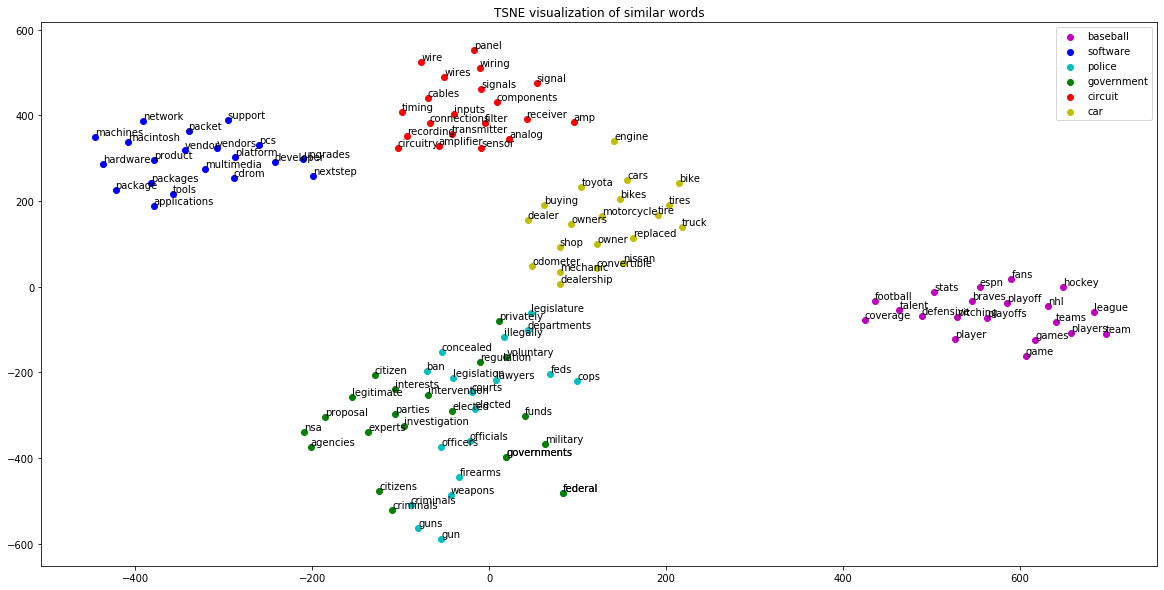

In [107]:
clr = ['m', 'b', 'c', 'g', 'r', 'y']

col=-1
j=0
#plotting the similar words
plt.figure(figsize=(20, 10)) 
plt.title("TSNE visualization of similar words")
for i in new_vectors:
    if((j%20)==0):
        col=col+1
        plt.scatter(i[0],i[1],c=clr[col],label=lst[col])
    else:
        plt.scatter(i[0],i[1],c=clr[col])
    plt.annotate(plt_lst[j],
                 xy=(i[0], i[1]),
                 va='bottom')
    j=j+1
plt.legend()
plt.show()

### viii. The dataset consists of documents. Each document is a datapoint. Formulate a methodology to represent each document as a vector using the word vectors. Mention the method employed to create the vector representation of the documents -->

To represent each document as a vector using word vectors, a method could be to break the document into different sentences and find an average of all the vectors of useful words in a sentence to derive vector for each sentence. And then using those vectors of each sentence, we can find the vector representation of the given document by finding weighted average of vector of sentences. These weights could be expression of length of a sentence, mode of frequency of a word in sentence, etc.

To represent each document as a vector using word vectors, a method could be to break the document into different sentences and find an average of all the vectors of useful words in a sentence to derive vector for each sentence. And then using those vectors of each sentence, we can find the vector representation of the given document by finding weighted average of vector of sentences. These weights could be expression of length of a sentence, mode of frequency of a word in sentence, etc.

<br><br><br><br><br>
### (b) i. Split the dataset into training (70%), validation(10%) and testing(20%) data -->

In [0]:
#methods : skip-gram, bag_of_words

model1 = Word2Vec(news_data, min_count=10, size=100, workers=4, sg=0)  #BOW
model2 = Word2Vec(news_data, min_count=10, size=100, workers=4, sg=1)  #SG

vector1 = model1.wv
vector2 = model2.wv

In [109]:
#shuffling the dataset

print(len(news_data))

from sklearn.utils import shuffle

news_train_target = np.array(news_train.target[:])
news_data, news_train_target  = shuffle(news_data, news_train_target)

18846


In [110]:
print(news_train_target[0], news_train_target[1])

8 10


In [111]:
X_train = news_data[ : int(0.7*len(news_data))]
Y_train = news_train_target[ : int(0.7*len(news_data))]
X_test = news_data[int(0.7*len(news_data)):int(0.9*len(news_data))]
Y_test = news_train_target[int(0.7*len(news_data)):int(0.9*len(news_data))]
X_val = news_data[int(0.9*len(news_data)) : ]
Y_val = news_train_target[int(0.9*len(news_data)) : ]

print("Training data size : {}".format(len(X_train)))

Training data size : 13192


In [0]:
# For BOW (model1)

X_train1 = np.zeros((len(X_train), 100))
j=0
for vec in X_train:
    now = 0
    for word in vec:
        if word in vector1:
            X_train1[j] = X_train1[j] + vector1[word]
            now = now + 1
    
    X_train1[j] = X_train1[j] / now     #averaging
    j = j + 1

    
X_test1 = np.zeros((len(X_test), 100))
j=0
for vec in X_test:
    now = 0
    for word in vec:
        if word in vector1:
            X_test1[j] = X_test1[j] + vector1[word]
            now = now + 1
    
    X_test1[j] = X_test1[j] / now
    j = j + 1
    
    
X_val1 = np.zeros((len(X_val), 100))
j=0
for vec in X_val:
    now = 0
    for word in vec:
        if word in vector1:
            X_val1[j] = X_val1[j] + vector1[word]
            now = now + 1
    
    X_val1[j] =X_val1[j] / now
    j = j + 1
    
    
# ------------------------------------------------------------------------------------    
# For SG (model2)

X_train2 = np.zeros((len(X_train), 100))
j=0
for vec in X_train:
    now = 0
    for word in vec:
        if word in vector2:
            X_train2[j] = X_train2[j] + vector2[word]
            now = now + 1
    
    X_train2[j] = X_train2[j] / now     #averaging
    j = j + 1

    
X_test2 = np.zeros((len(X_test), 100))
j=0
for vec in X_test:
    now = 0
    for word in vec:
        if word in vector2:
            X_test2[j] = X_test2[j] + vector2[word]
            now = now + 1
    
    X_test2[j] = X_test2[j] / now
    j = j + 1
    
    
X_val2 = np.zeros((len(X_val), 100))
j=0
for vec in X_val:
    now = 0
    for word in vec:
        if word in vector2:
            X_val2[j] = X_val2[j] + vector2[word]
            now = now + 1
    
    X_val2[j] = X_val2[j] / now
    j = j + 1

In [113]:
print(Y_train)

[ 8 10  2 ...  7  7 11]


### ii. Plot the loss vs iteration curve, classification error vs iteration curve, classification accuracy vs iteration curve for training data and report your observations -->

In [0]:
#BOW
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)
])

model1.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc1 = model1.fit(X_train1, Y_train, epochs = 150, verbose = 0)

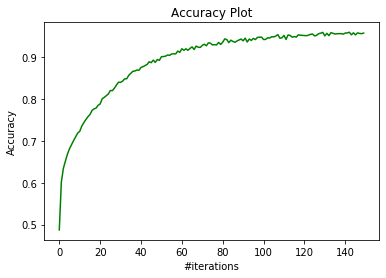

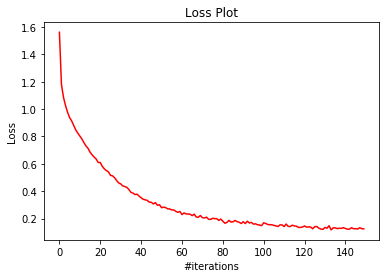

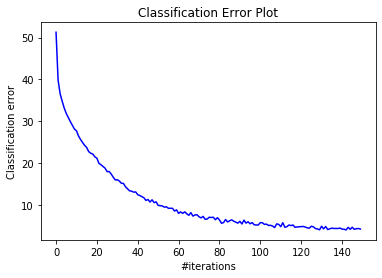

In [115]:
accuracy_lst = epoc1.history['acc']
loss_lst = epoc1.history['loss']
class_error_lst = (1-np.array(epoc1.history['acc']))*100

plt.plot(accuracy_lst, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.show()
    
plt.plot(loss_lst, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

plt.plot(class_error_lst, c='b')
plt.xlabel('#iterations')
plt.ylabel('Classification error')
plt.title('Classification Error Plot')
plt.show()

In [116]:
#Validation loss, and accuracy for BOW
lo, ac = model1.evaluate(X_val1, Y_val, verbose = 0)
print("Validation Loss: ", lo)
print("Validation Accuracy : ", ac)

Validation Loss:  1.5900569654586145
Validation Accuracy :  0.733687


In [0]:
#SG
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(300, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(250, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation=tf.nn.softmax)
])

model2.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

epoc2 = model2.fit(X_train2, Y_train, epochs = 150, verbose = 0)

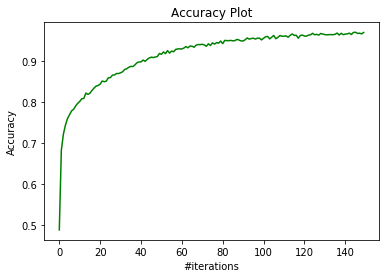

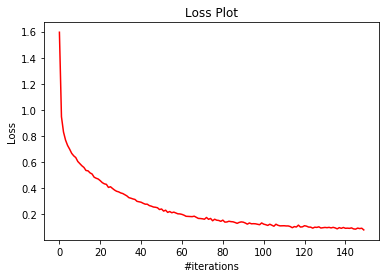

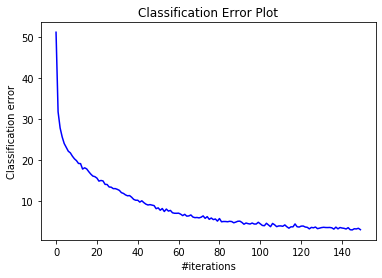

In [118]:
accuracy_lst = epoc2.history['acc']
loss_lst = epoc2.history['loss']
class_error_lst = (1-np.array(epoc2.history['acc']))*100

plt.plot(accuracy_lst, c='g')
plt.xlabel('#iterations')
plt.ylabel('Accuracy')
plt.title('Accuracy Plot')
plt.show()
    
plt.plot(loss_lst, c='r')
plt.xlabel('#iterations')
plt.ylabel('Loss')
plt.title('Loss Plot')
plt.show()

plt.plot(class_error_lst, c='b')
plt.xlabel('#iterations')
plt.ylabel('Classification error')
plt.title('Classification Error Plot')
plt.show()

In [119]:
#Validation loss, and accuracy for SG
lo, ac = model2.evaluate(X_val2, Y_val, verbose = 0)
print("Validation Loss: ", lo)
print("Validation Accuracy : ", ac)

Validation Loss:  1.0304493862690913
Validation Accuracy :  0.82015914


### iii. Find the classification accuracy, the number of true positives, true negatives, false positives and false negatives for both training and test data -->

In [0]:
def perf_measure(y_actual, y_pred):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1
    return(TP, FP, TN, FN)

In [121]:
print(np.argmax(model2.predict(X_train2), axis = 1))
print(Y_train)

[ 8 10  2 ...  7  7 11]
[ 8 10  2 ...  7  7 11]


In [122]:
#for training data : TP, FP, FN, TN ->
tp, fp, tn, fn = perf_measure(Y_train, np.argmax(model2.predict(X_train2), axis = 1))
print(tp ,fp, tn, fn)

655 0 550 0


In [123]:
#test loss and accuracy for SG
lo, ac = model2.evaluate(X_test2, Y_test, verbose = 0)
print("Test Loss: ", lo)
print("Test Accuracy : ", ac)

Test Loss:  0.9355334449617766
Test Accuracy :  0.83496946


In [124]:
#for test data : TP, FP, FN, TN ->
tp, fp, tn, fn = perf_measure(Y_test, np.argmax(model2.predict(X_test2), axis = 1))
print(tp ,fp, tn, fn)

129 29 116 17


### iv. There are two training algorithms for Word2Vec: skip-gram and bag of words. Which training algorithm is performing better in this data set? -->

### Best Training Algorithm : Skip-Gram algorithm


Skip-gram algorithm--> i. Validation Accuracy : 84.2% ii. Validation Loss : 0.88 Bag of Words algorithm--> i. Validation Accuracy : 73.8% ii. Validation Loss : 1.41

Skip-gram algorithm works best as it gives out more validation accuracy and lesser validation loss as compared to the BagofWords algorithm irrespective of hyperparameter settings.



Skip-gram algorithm-->
    i. Validation Accuracy : 84.2%
    ii. Validation Loss : 0.88
Bag of Words algorithm-->
    i. Validation Accuracy : 73.8%
    ii. Validation Loss :  1.41

Skip-gram algorithm works best as it gives out more validation accuracy and lesser validation loss as compared to the BagofWords algorithm irrespective of hyperparameter settings.